<a href="https://colab.research.google.com/github/AshwaniNITR/AIML/blob/main/ai%26ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
data['Sleep Disorder'] = data['Sleep Disorder'].fillna('None')
data['Sleep Disorder'] = data['Sleep Disorder'].map({'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2})
data = data.dropna(subset=['Sleep Disorder'])
print(data.head())

   Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps  Sleep Disorder  
0         126/83          77         4200               0  
1         125/80          75    

In [ ]:
data = data.drop(columns=['Person ID', 'Occupation', 'BMI Category', 'Blood Pressure', 'Daily Steps'])
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

from sklearn.preprocessing import StandardScaler
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep',
                      'Physical Activity Level', 'Stress Level', 'Heart Rate']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [ ]:
print("\nFirst few rows of the preprocessed dataset:")
print(data.head())


First few rows of the preprocessed dataset:
   Gender       Age  Sleep Duration  Quality of Sleep  \
0       0 -1.753096       -1.298887         -1.098280   
1       0 -1.637643       -1.173036         -1.098280   
2       0 -1.637643       -1.173036         -1.098280   
3       0 -1.637643       -1.550588         -2.771424   
4       0 -1.637643       -1.550588         -2.771424   

   Physical Activity Level  Stress Level  Heart Rate  Sleep Disorder  
0                -0.825418      0.347021    1.654719               0  
1                 0.039844      1.475592    1.170474               0  
2                 0.039844      1.475592    1.170474               0  
3                -1.402260      1.475592    3.591698               2  
4                -1.402260      1.475592    3.591698               2  


In [ ]:
print(data.describe())

           Gender           Age  Sleep Duration  Quality of Sleep  \
count  374.000000  3.740000e+02    3.740000e+02      3.740000e+02   
mean     0.494652 -4.559633e-16    1.348891e-15      2.469801e-16   
std      0.500641  1.001340e+00    1.001340e+00      1.001340e+00   
min      0.000000 -1.753096e+00   -1.676439e+00     -2.771424e+00   
25%      0.000000 -8.006081e-01   -9.213348e-01     -1.098280e+00   
50%      0.000000  9.415288e-02    8.547080e-02     -2.617083e-01   
75%      1.000000  9.023241e-01    8.405750e-01      5.748635e-01   
max      1.000000  1.941401e+00    1.721530e+00      1.411435e+00   

       Physical Activity Level  Stress Level    Heart Rate  Sleep Disorder  
count             3.740000e+02  3.740000e+02  3.740000e+02      374.000000  
mean             -3.324732e-17  1.994839e-16 -1.377389e-15        0.622995  
std               1.001340e+00  1.001340e+00  1.001340e+00        0.808537  
min              -1.402260e+00 -1.345836e+00 -1.250750e+00        0.00

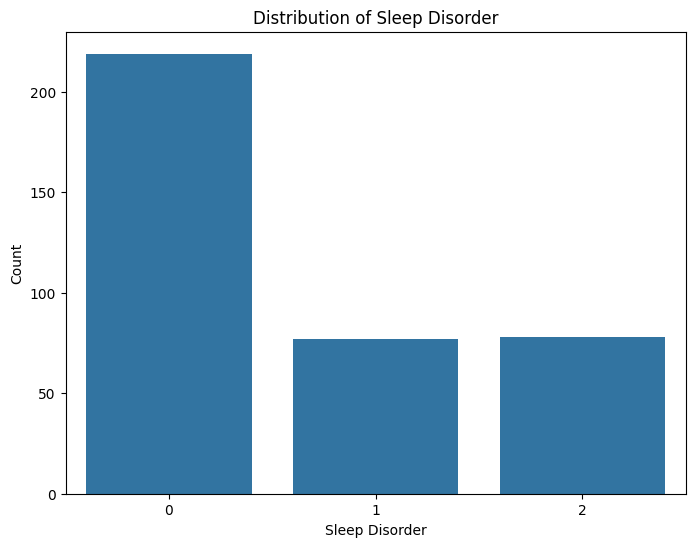

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Sleep Disorder' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep Disorder', data=data)
plt.title('Distribution of Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.show()


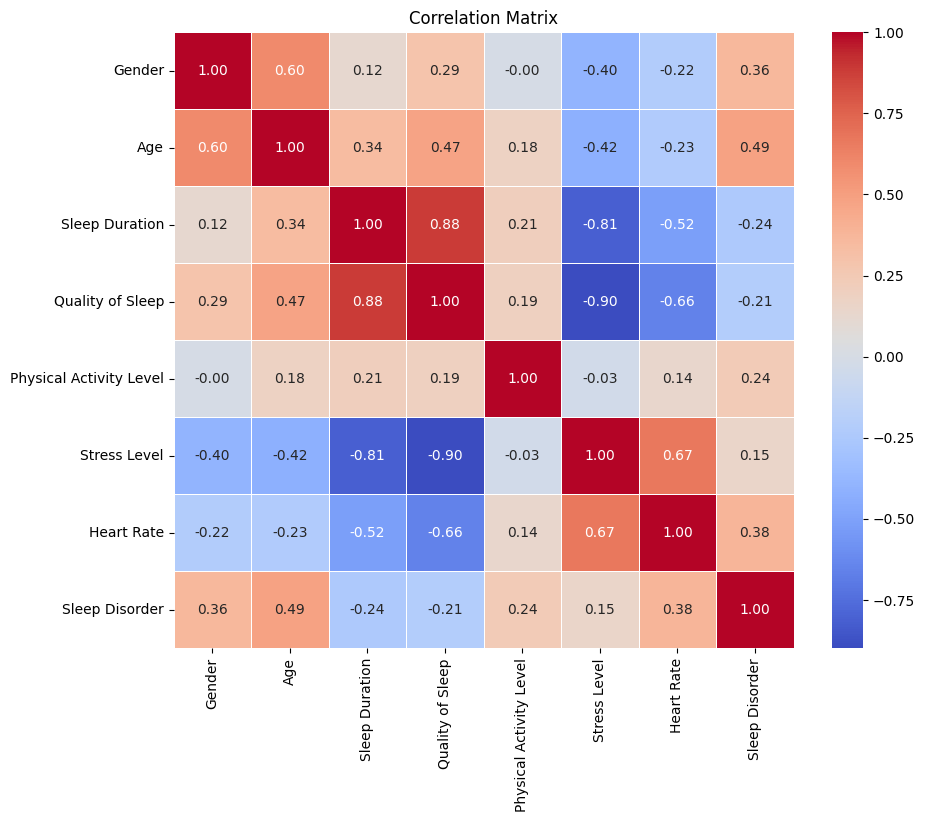

In [ ]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


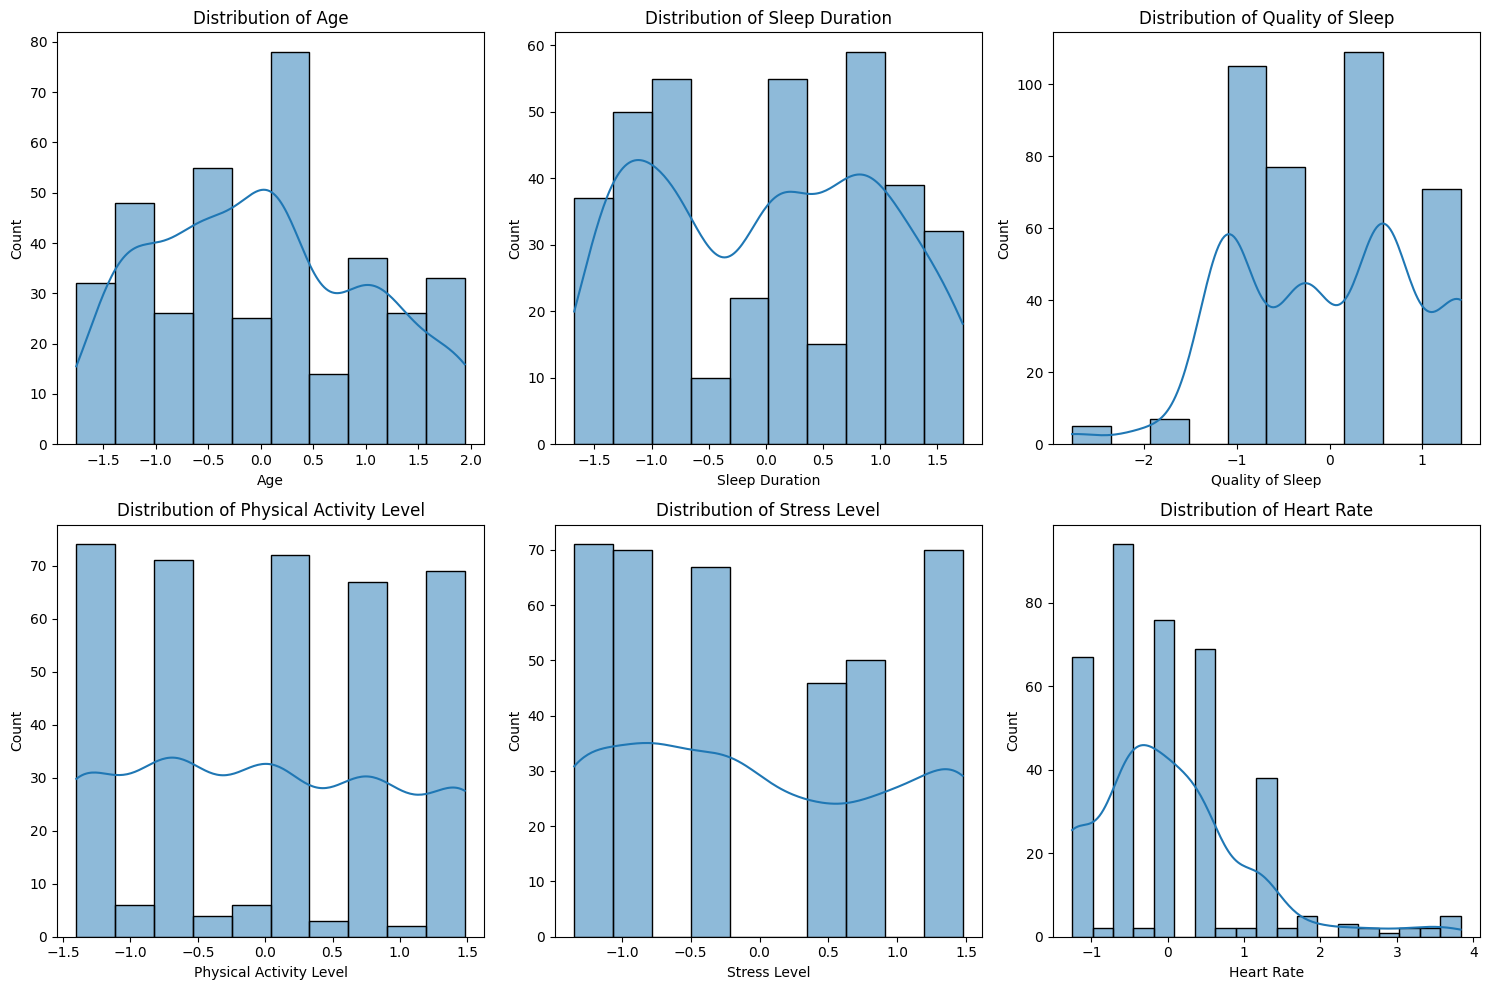

In [ ]:
# Visualizing distributions of key features
features_to_plot = ['Age', 'Sleep Duration', 'Quality of Sleep',
                    'Physical Activity Level', 'Stress Level', 'Heart Rate']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


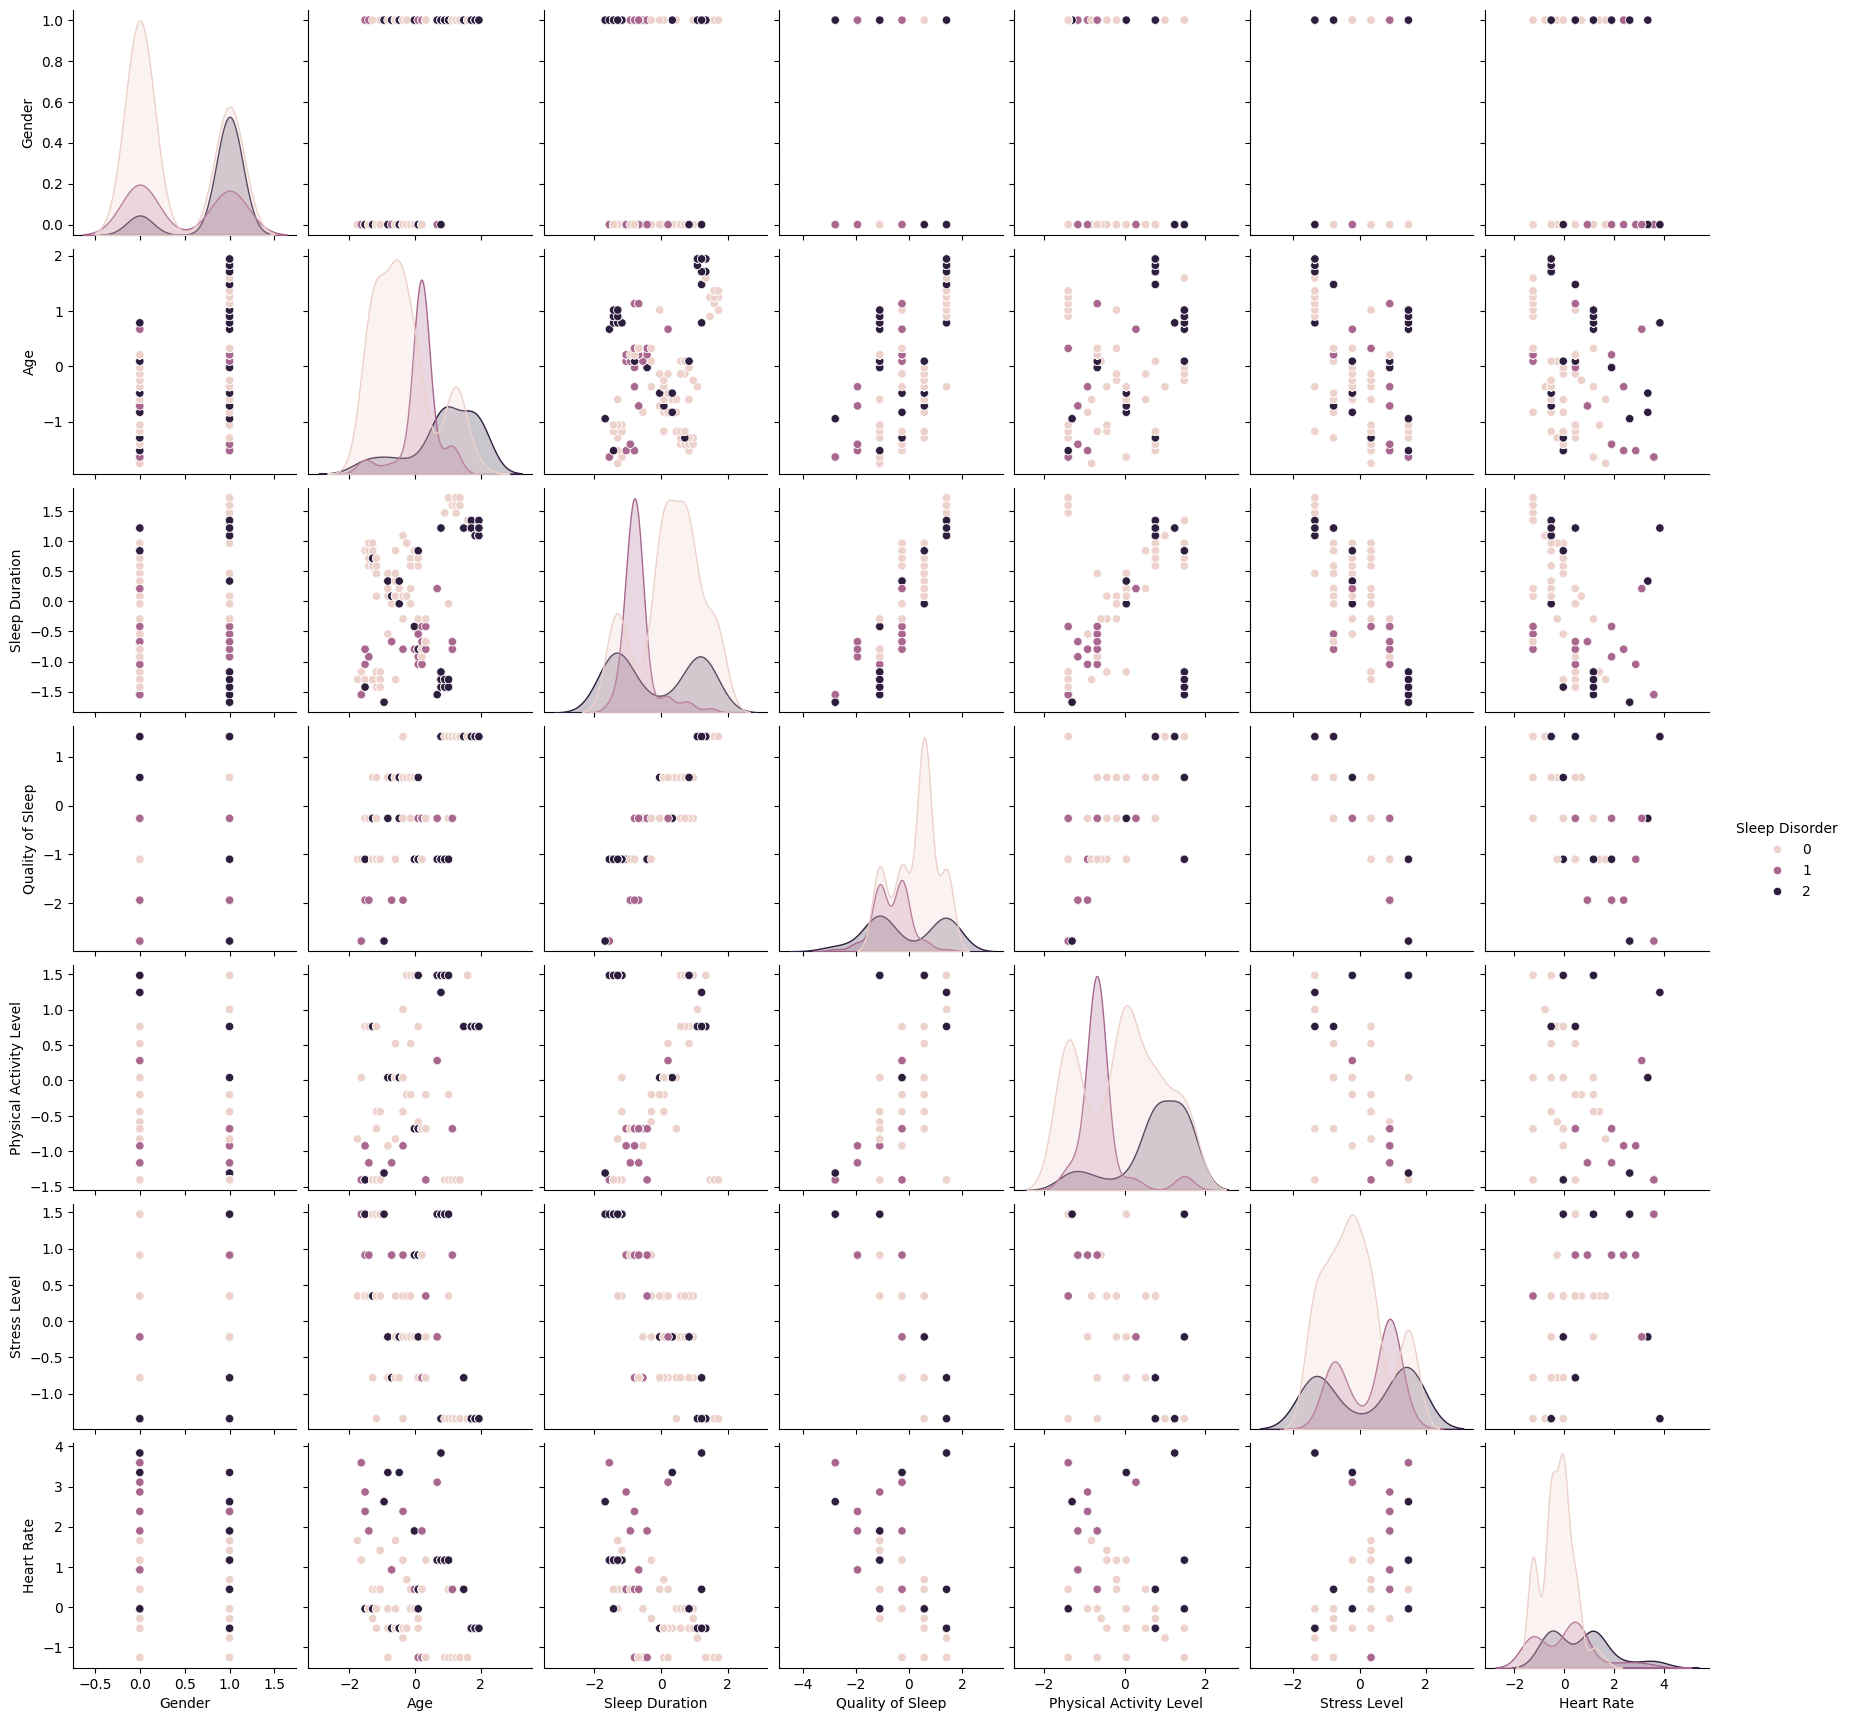

In [ ]:
# Pairplot to explore relationships between variables
sns.pairplot(data, hue='Sleep Disorder', diag_kind='kde')
plt.show()


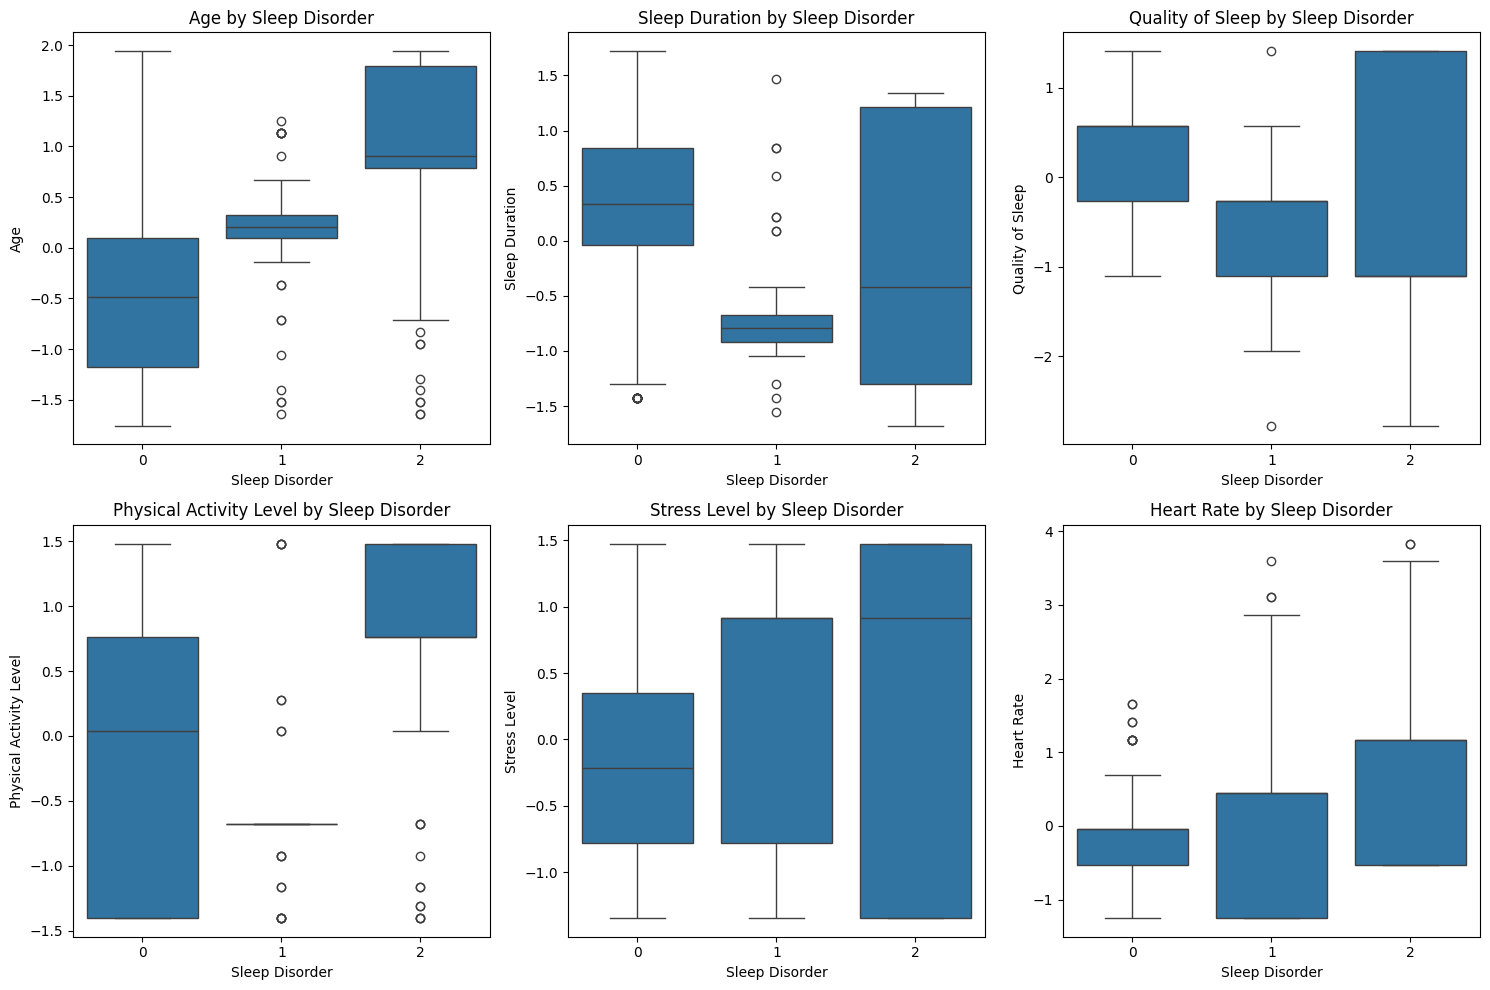

In [ ]:
# Boxplots for key features to explore their relationship with the target variable 'Sleep Disorder'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='Sleep Disorder', y=feature, data=data)
    plt.title(f'{feature} by Sleep Disorder')
plt.tight_layout()
plt.show()


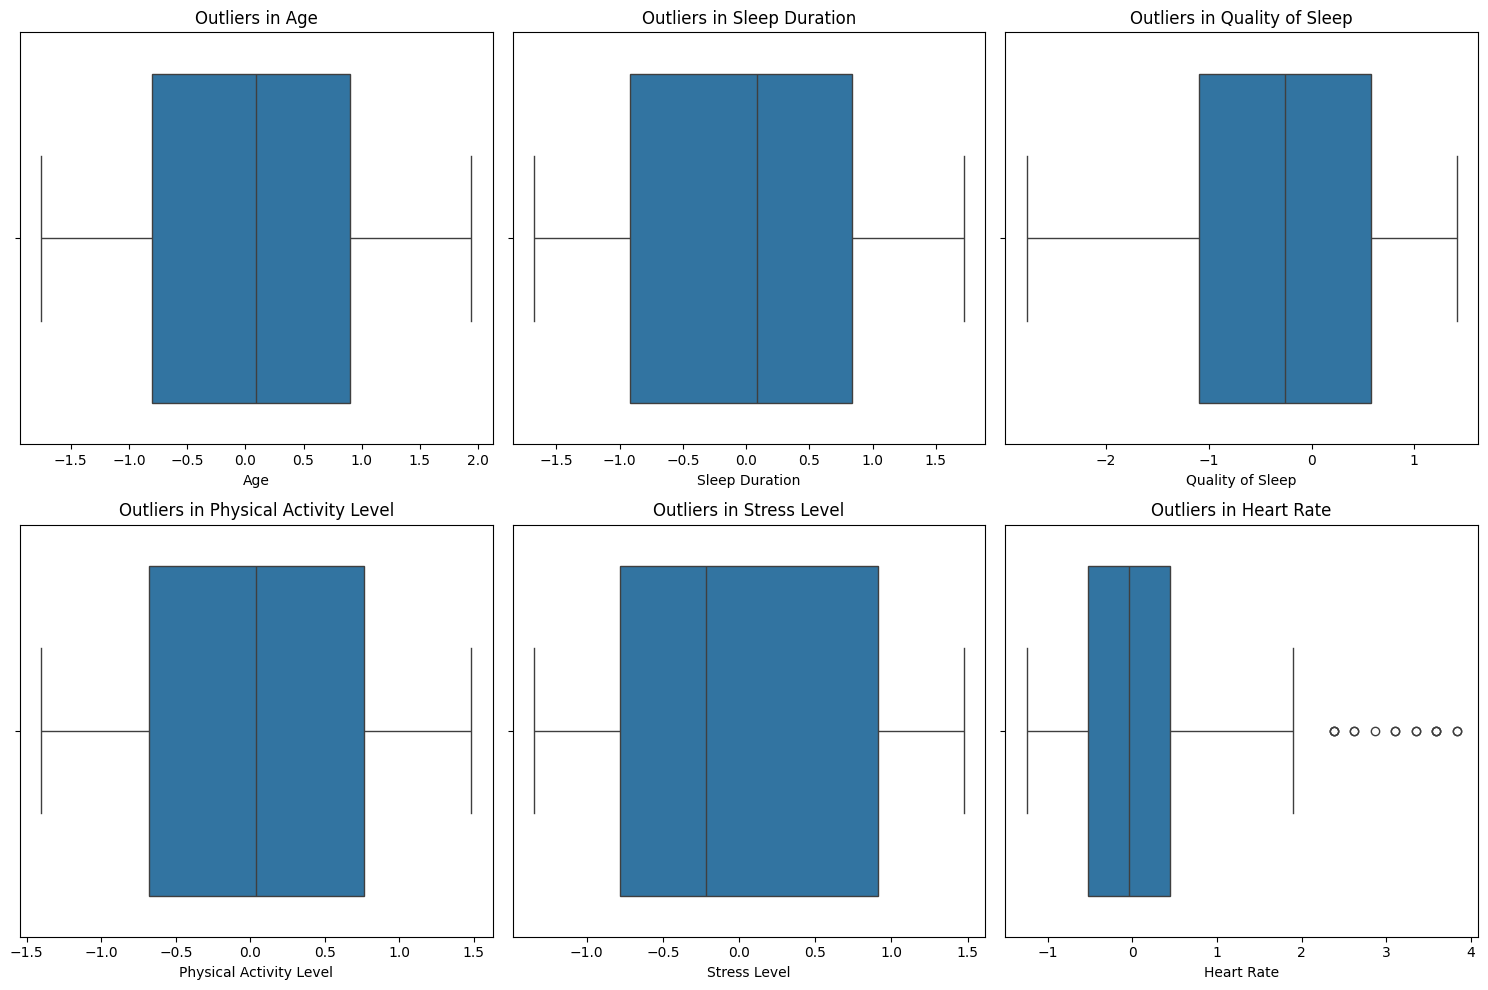

In [ ]:
# Detecting outliers using boxplots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data[feature])
    plt.title(f'Outliers in {feature}')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = data.drop(columns=['Sleep Disorder'])  # All features except the target
y = data['Sleep Disorder']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_continuous = lr_model.predict(X_test)

y_pred_class = []
for value in y_pred_continuous:
    if value < 0.5:
        y_pred_class.append(0)  # None
    elif 0.5 <= value < 1.5:
        y_pred_class.append(1)  # Insomnia
    else:
        y_pred_class.append(2)  # Sleep Apnea

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_class))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_class))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_class))


Confusion Matrix:
[[41  2  0]
 [ 2 13  1]
 [ 0 12  4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.48      0.81      0.60        16
           2       0.80      0.25      0.38        16

    accuracy                           0.77        75
   macro avg       0.74      0.67      0.65        75
weighted avg       0.82      0.77      0.76        75


Accuracy Score: 0.7733333333333333


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[42  1  0]
 [ 2 13  1]
 [ 2  2 12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.81      0.81      0.81        16
           2       0.92      0.75      0.83        16

    accuracy                           0.89        75
   macro avg       0.88      0.85      0.86        75
weighted avg       0.89      0.89      0.89        75


Accuracy Score: 0.8933333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


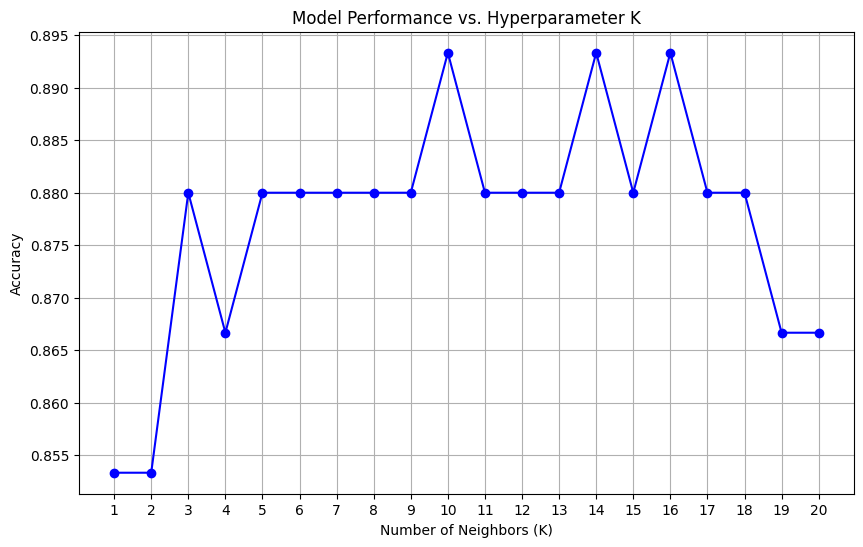

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize lists to store performance metrics
k_values = range(1, 21)  # Test K values from 1 to 20
accuracies = []

# Loop through different values of K
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the performance vs. K graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Model Performance vs. Hyperparameter K')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the SVM model
svm_model = SVC(kernel='rbf', probability=True)  # Using RBF kernel (default)
svm_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred))


Confusion Matrix:
[[42  1  0]
 [ 1 13  2]
 [ 1  4 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.72      0.81      0.76        16
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75


Accuracy Score: 0.88


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Perform grid search with cross-validation
grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", grid.best_score_)

# Use the best model to predict on the test set
best_svm_model = grid.best_estimator_
y_pred_best = best_svm_model.predict(X_test)

# Evaluate the tuned model
print("\nConfusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))

print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best))

print("\nAccuracy Score (Best Model):", accuracy_score(y_test, y_pred_best))

Best Parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best Cross-Validation Accuracy: 0.9063276836158194

Confusion Matrix (Best Model):
[[42  1  0]
 [ 1 13  2]
 [ 1  3 12]]

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.76      0.81      0.79        16
           2       0.86      0.75      0.80        16

    accuracy                           0.89        75
   macro avg       0.86      0.85      0.85        75
weighted avg       0.89      0.89      0.89        75


Accuracy Score (Best Model): 0.8933333333333333


In [ ]:
# Initialize the SVM model with a linear kernel
svm_linear_model = SVC(kernel='linear', probability=True)
svm_linear_model.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = svm_linear_model.predict(X_test)

# Evaluate the performance
print("Confusion Matrix (Linear Kernel):")
print(confusion_matrix(y_test, y_pred_linear))

print("\nClassification Report (Linear Kernel):")
print(classification_report(y_test, y_pred_linear))

print("\nAccuracy Score (Linear Kernel):", accuracy_score(y_test, y_pred_linear))

Confusion Matrix (Linear Kernel):
[[42  1  0]
 [ 2 13  1]
 [ 2  2 12]]

Classification Report (Linear Kernel):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.81      0.81      0.81        16
           2       0.92      0.75      0.83        16

    accuracy                           0.89        75
   macro avg       0.88      0.85      0.86        75
weighted avg       0.89      0.89      0.89        75


Accuracy Score (Linear Kernel): 0.8933333333333333


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


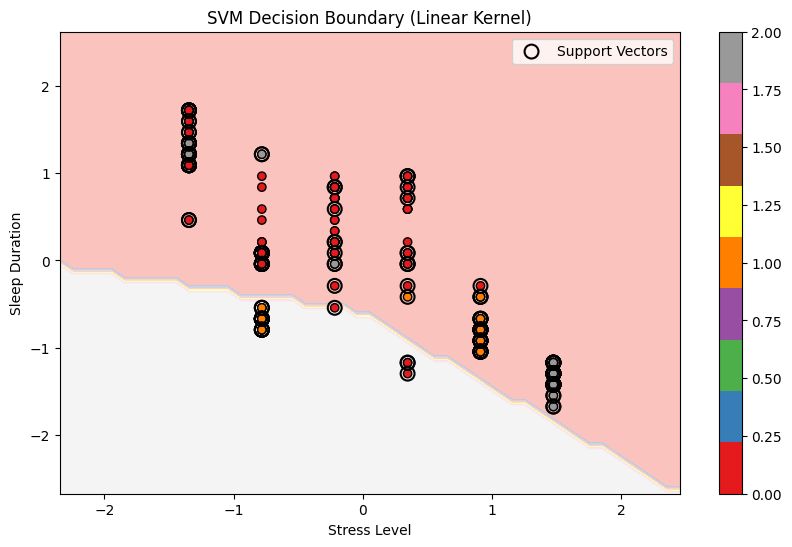

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Select two features for visualization
X_train_2D = X_train[['Stress Level', 'Sleep Duration']]
X_test_2D = X_test[['Stress Level', 'Sleep Duration']]

# Train SVM with a linear kernel
svm_linear_model_2D = SVC(kernel='linear')
svm_linear_model_2D.fit(X_train_2D, y_train)

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X_train_2D['Stress Level'].min() - 1, X_train_2D['Stress Level'].max() + 1
y_min, y_max = X_train_2D['Sleep Duration'].min() - 1, X_train_2D['Sleep Duration'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the decision boundary
Z = svm_linear_model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and support vectors
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Pastel1')
scatter = plt.scatter(X_train_2D['Stress Level'], X_train_2D['Sleep Duration'], c=y_train, edgecolor='k', cmap='Set1')
plt.colorbar(scatter)

# Highlight support vectors
plt.scatter(svm_linear_model_2D.support_vectors_[:, 0], svm_linear_model_2D.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', linewidth=1.5, label='Support Vectors')

# Add labels and title
plt.title('SVM Decision Boundary (Linear Kernel)')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


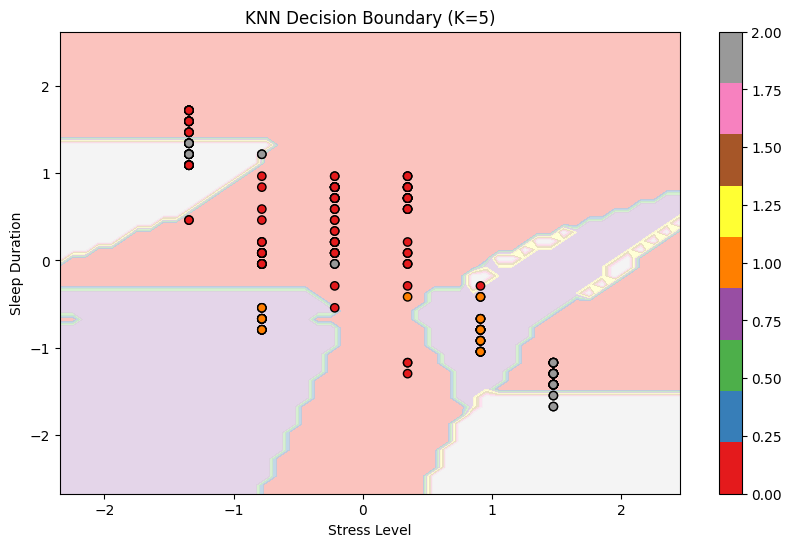

In [ ]:
# Select two features for visualization
X_train_2D = X_train[['Stress Level', 'Sleep Duration']]
X_test_2D = X_test[['Stress Level', 'Sleep Duration']]

# Train KNN with a chosen K (e.g., K=10)
k = 5
knn_model_2D = KNeighborsClassifier(n_neighbors=k)
knn_model_2D.fit(X_train_2D, y_train)

# Create a meshgrid for plotting the decision boundary
x_min, x_max = X_train_2D['Stress Level'].min() - 1, X_train_2D['Stress Level'].max() + 1
y_min, y_max = X_train_2D['Sleep Duration'].min() - 1, X_train_2D['Sleep Duration'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict the decision boundary
Z = knn_model_2D.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap='Pastel1')
scatter = plt.scatter(X_train_2D['Stress Level'], X_train_2D['Sleep Duration'], c=y_train, edgecolor='k', cmap='Set1')
plt.colorbar(scatter)

# Add labels and title
plt.title(f'KNN Decision Boundary (K={k})')
plt.xlabel('Stress Level')
plt.ylabel('Sleep Duration')
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_rf))


Confusion Matrix:
[[42  1  0]
 [ 1 13  2]
 [ 3  2 11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.81      0.81      0.81        16
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75


Accuracy Score: 0.88


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best parameters and performance
print("Best Parameters:", grid_rf.best_params_)
print("Best Cross-Validation Accuracy:", grid_rf.best_score_)

# Use the best model to predict on the test set
best_rf_model = grid_rf.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate the tuned model
print("\nConfusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best_rf))

print("\nClassification Report (Best Model):")
print(classification_report(y_test, y_pred_best_rf))

print("\nAccuracy Score (Best Model):", accuracy_score(y_test, y_pred_best_rf))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Cross-Validation Accuracy: 0.9063841807909606

Confusion Matrix (Best Model):
[[42  1  0]
 [ 1 13  2]
 [ 3  2 11]]

Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        43
           1       0.81      0.81      0.81        16
           2       0.85      0.69      0.76        16

    accuracy                           0.88        75
   macro avg       0.86      0.83      0.84        75
weighted avg       0.88      0.88      0.88        75


Accuracy Score (Best Model): 0.88


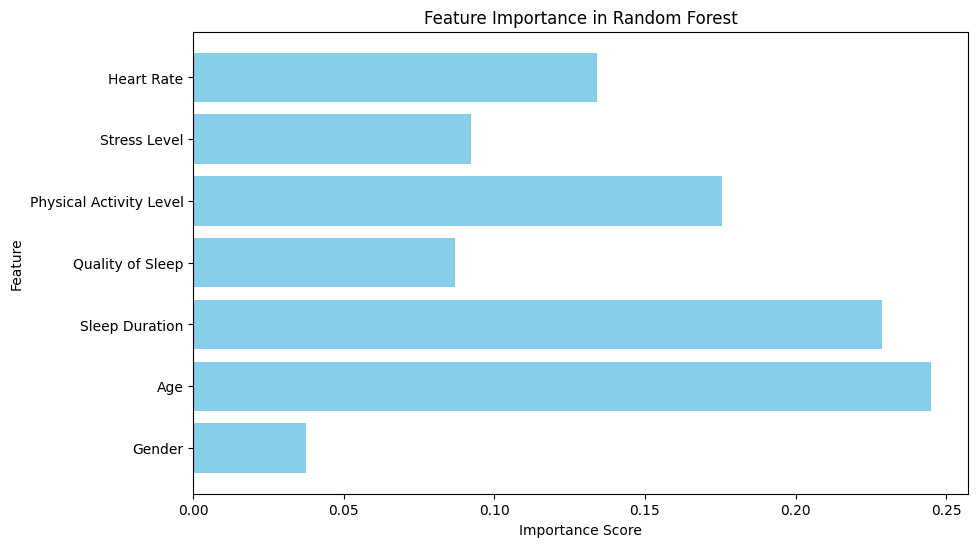

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances from the model
importances = rf_model.feature_importances_
features = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the ANN
model = Sequential()

# Input layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Dropout to prevent overfitting

# Output layer (softmax for multi-class classification)
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the ANN
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the ANN
y_pred_ann = model.predict(X_test)
y_pred_ann_classes = y_pred_ann.argmax(axis=1)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ann_classes))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_ann_classes))

print("\nAccuracy Score:", accuracy_score(y_test, y_pred_ann_classes))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2298 - loss: 1.2233 - val_accuracy: 0.3000 - val_loss: 1.1038
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3103 - loss: 1.1010 - val_accuracy: 0.6167 - val_loss: 1.0101
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5099 - loss: 1.0042 - val_accuracy: 0.7333 - val_loss: 0.9329
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7087 - loss: 0.9196 - val_accuracy: 0.7667 - val_loss: 0.8680
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7981 - loss: 0.8189 - val_accuracy: 0.7667 - val_loss: 0.8116
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7955 - loss: 0.7625 - val_accuracy: 0.7667 - val_loss: 0.7573
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8132 - loss: 0.7094 - val_accuracy: 0.8333 - val_loss: 0.7063
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8508 - loss: 0.6506 - val_accuracy: 0.8500 - val_loss: 0.6577
Epoch 9/50
8/8 ━━━